#**Actividad 7: Interpolación lineal y de Lagrange- Melanie Muñoz Chavarria**

1. Construir un programa que permita calcular una interpolación lineal, para ello debera realizar lo siguiente:

a. Deducir el método de interpolación lineal y encontrar la ecuación general de recurrencia que permite interpolar.
b. Aplicar el método para dos puntos.
c. Generalizar el método para N de puntos.


2. Determinar la interpolacion lineal que pasa por los puntos(2, 4), y (5, 1). Escribir la solución en código markdown.

3. Disenar un programa general,  que realice la interpolación de lagrange según lo visto en clase.

In [ ]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd
import sympy as sy

##**Interpolación Lineal**

###Aplicación del método para algunos puntos

In [ ]:
#Valores de los puntos
x_valores=np.array([2,4,6])
y_valores=np.array([1,3,7])

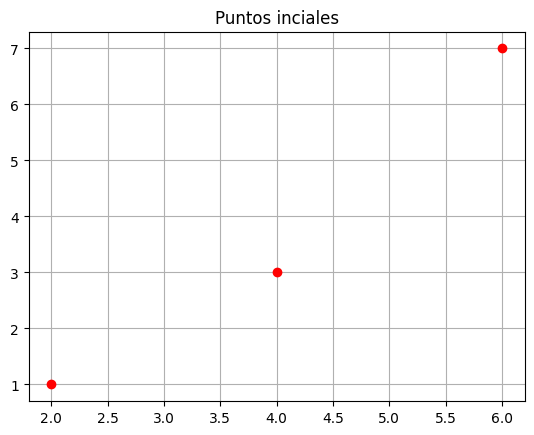

In [ ]:
#Grafica de los puntos
plt.figure()
plt.plot(x_valores,y_valores,'r.',markersize=12)
plt.title('Puntos inciales')
plt.grid()

In [ ]:
#Pendientes par las rectas que interpolaran los datos de forma lineal
#A través de los los arrays de ceros, se guardarán los valores de las pendientes
pendientes=np.zeros(len(x_valores)-1)

for i in range(0,len(x_valores)-1):
  mi=(y_valores[i+1]-y_valores[i])/(x_valores[i+1]-x_valores[i]) #Para obtener los valores de las pendientes
  pendientes[i]=mi

print(pendientes)

[1. 2.]


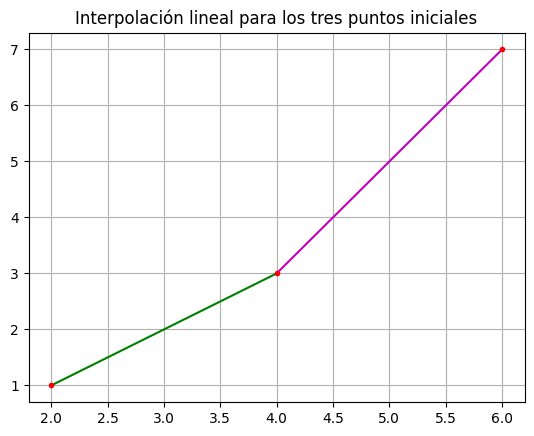

In [ ]:
#Gráfico de las rectas para los tres puntos tomados, interpolación lineal
#Intervalos de x
x1=np.linspace(x_valores[0],x_valores[1],100)
x2=np.linspace(x_valores[1],x_valores[2],100)

#Resultados de y
y1=y_valores[0] + pendientes[0]*(x1-x_valores[0])
y2=y_valores[1] + pendientes[1]*(x2-x_valores[1])

#Gráfico de interpolación para los tres puntos
plt.figure()
plt.title('Interpolación lineal para los tres puntos iniciales')
plt.plot(x1,y1,'-g')
plt.plot(x2,y2,'-m')
plt.plot(x_valores,y_valores,'r.')
plt.grid()

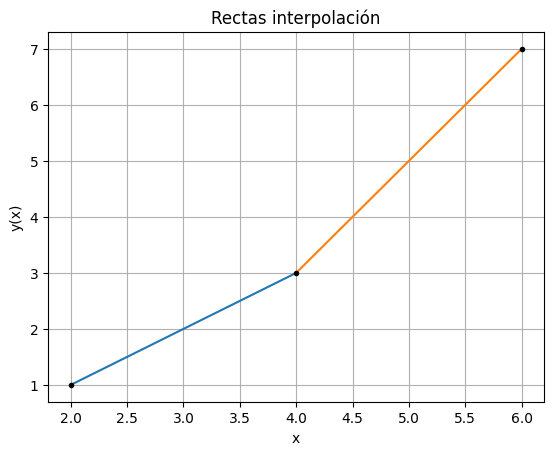

In [ ]:
x_valores=np.array([2,4,6])
y_valores=np.array([1,3,7])

ecuacion= lambda x,x0,y0,m: y0+m*(x-x0)

#Generalización para los tres puntos, donde se obteine la ecuación de la rectas
for j in range(0,len(x_valores)-1):
  xi=np.linspace(x_valores[j],x_valores[j+1],100)
  y=ecuacion(xi,x_valores[j],y_valores[j],pendientes[j])
  f=plt.plot(xi,y)
print(f)

#Cualidades diferentes para la gráfica
plt.title('Rectas interpolación')
plt.ylabel('y(x)')
plt.xlabel('x')
plt.grid()

plt.plot(x_valores,y_valores,'k.')


###Generalización

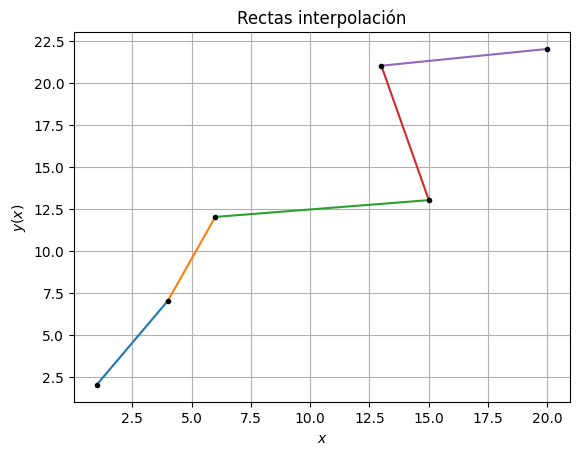

In [ ]:
#Genralización con una función, para diversos puntos
def rectas_interpolacion(x_valores,y_valores):
  if len(x_valores)==len(y_valores): #Esto para ganaratizar que los puntos en 'x' tengan su respectivo valor en y
    pendientes=np.zeros(len(x_valores)-1)

    #Se obteinen las pentines
    for i in range(0,len(x_valores)-1):
      mi=(y_valores[i+1]-y_valores[i])/(x_valores[i+1]-x_valores[i])
      pendientes[i]=mi

    #Se obtienen las ecuaciones y se grafican
    for j in range(0,len(x_valores)-1):
      xi=np.linspace(x_valores[j],x_valores[j+1],100)
      y=ecuacion(xi,x_valores[j],y_valores[j],pendientes[j])
      f=plt.plot(xi,y)

    #Otras cualidades del gráfico
    plt.title('Rectas interpolación')
    plt.ylabel('${y(x)}$')
    plt.xlabel('${x}$')
    plt.grid()
    plt.plot(x_valores,y_valores, 'k.')

    return f
  else:
    return 'Los arrays no tienen la misma de cantidad de valores'

x=np.array([1,4,6,15,13,20])
y=np.array([2,7,12,13,21,22])

rectas_interpolacion(x,y)

Text(0, 0.5, 'f(x)')

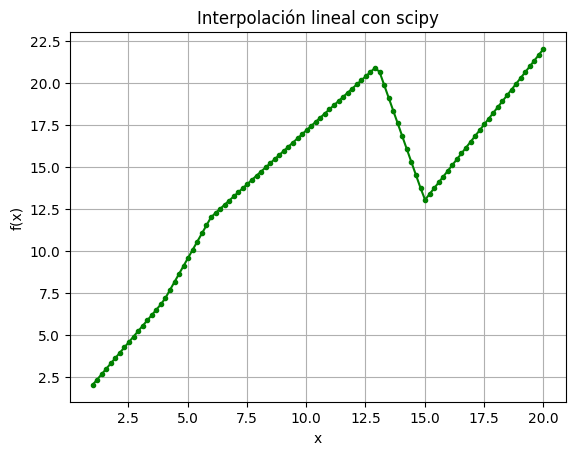

In [ ]:
#Probando con el resultado de scipy
f=sc.interpolate.interp1d(x, y) #Función que interpole linealmente los datos
x__= np.linspace(1, 20, 100)

#Gráfico
plt.figure()
plt.plot(x__, f(x__),'.g-')
plt.grid()
plt.title('Interpolación lineal con scipy')
plt.xlabel('x')
plt.ylabel('f(x)')

##**Interpolación de Lagrange**

####**Código markdown**

1. Definir lista con los valores de x, $x=[2,5,6]$.
2. Definir lista con los valores f(x), $y=[4,1,2]$.
3. Sea $L_0=L_1=L_2=1$.
4. Sea $j=1$.

 a. Desde i=1 hasta 3. Hacer:

      Si i diferente de j:

      $L_0=L_0 \frac{x-x_i}{x_j-x_i}$
5. Sea $j=1$.

 a. Desde i=1 hasta 3. Hacer:

      Si i diferente de j:

      $L_1=L_1 \frac{x-x_i}{x_j-x_i}$

6. Sea $j=2$

 a. Desde i=1 hasta 3. Hacer:

      Si i diferente de j:

      $L_2=L_2 \frac{x-x_i}{x_j-x_i}$
7. Sea $p(x)=y_0L_0+y_1L_1+y_2L_2$
8. Mostrar $p(x)$




  

###Para algunos puntos.

In [ ]:
#Vectores con valores
xv=np.array([2,5,6])
y=np.array([4,1,2])

In [ ]:
#Definición de x con sympy para realizar operaciones con ella
x=sy.Symbol('x')

#Productoria
#Indice superior de la productoria
n=len(xv)
#Valor inicial
L0=1
#Indice fijo
j=0
#Iteración de la productoria
for i in range(0,n):
    if i!=j:
      L0=L0*((x-xv[i])/(xv[j]-xv[i]))
#Repedición con el resto de valores
j1=1
L1=1
for i in range(0,n):
    if i!=j1:
      L1=L1*((x-xv[i])/(xv[j1]-xv[i]))
j2=2
L2=1
for i in range(0,n):
    if i!=j2:
      L2=L2*((x-xv[i])/(xv[j2]-xv[i]))

p=y[0]*L0+y[1]*L1+y[2]*L2
sy.simplify(p)

x**2/2 - 9*x/2 + 11

###Generalización

In [ ]:
#Prodcutorio
def L(j,xv):
  L0=1
  n=len(xv)
  for i in range(0,n):
    if i!=j:
      L0=L0*((x-xv[i])/(xv[j]-xv[i]))
  return L0

L(1,xv)

(6 - x)*(x/3 - 2/3)

In [ ]:
#Sumatoria
def polinomio(x,xv,y):
  p=0
  for i in range(0,n):
    p=p+y[i]*L(i,xv) #Para producir cada uno de los terminos, para cada valor de f(xi)

  return p


In [ ]:
sy.simplify(polinomio(x,xv,y))

x**2/2 - 9*x/2 + 11

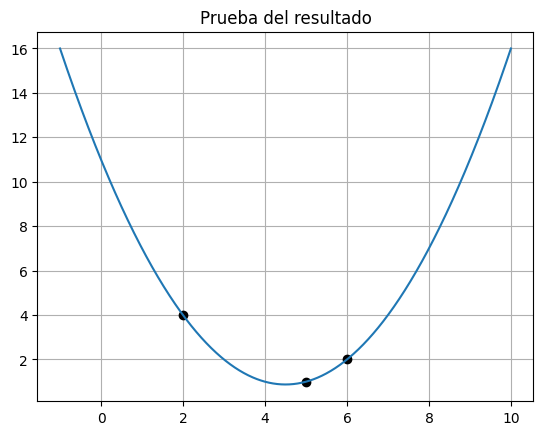

In [ ]:
#Prueba gráfica del resultado
poly=lambda x: ((x**2)/2) -(9/2)*x+11
xv_intervalo=np.linspace(-1,10,1000)
plt.figure()
plt.plot(xv,y,'.k',markersize=12)
plt.plot(xv_intervalo,poly(xv_intervalo))
plt.title('Prueba del resultado')
plt.grid()